## Import des bibliothèques 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


### Chargement des dataframe pour le projet

In [29]:
x_train = pd.read_csv(r"./data/x_train.csv")
y_train = pd.read_csv(r"./data/y_train.csv")
x_test = pd.read_csv(r"./data/x_test.csv")

### Début de l'analyse des dataframes

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(8028, 2)
(8028, 2)
(2035, 2)


In [31]:
x_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [32]:
y_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


In [33]:
x_test.head()

,ID,question
0,8028,autisme-homéopathie-antidote vaccins ??
1,8029,Quel topique appliquer pour dermatite atopique...
2,8030,traitement kystes avec diane 35?
3,8031,je souffre d'insuffisance veineuse (acrocyanos...
4,8032,"je suis enceinte depuis 1 mois, est ce que les..."


#### Ragard des types pour chaque variable

In [34]:
x_train.dtypes

ID           int64
question    object
dtype: object

In [35]:
y_train.dtypes

ID           int64
intention    int64
dtype: object

In [36]:
x_test.dtypes

ID           int64
question    object
dtype: object

#### vérification de la présence de doublons

In [37]:
print("Nombre de valeur unique pour chaque variable de la data frame x_train : ")
print(x_train.nunique())

print("Nombre de valeur unique pour chaque variable de la data frame y_train : ")
print(y_train.nunique())


Nombre de valeur unique pour chaque variable de la data frame x_train : 
ID          8028
question    7655
dtype: int64
Nombre de valeur unique pour chaque variable de la data frame y_train : 
ID           8028
intention      51
dtype: int64


#### Nombre de valeur manquantes

In [38]:
print("Nombre de valeur manquantes pour chaque variable de la data frame x_train : ")
print(x_train.isna().sum())

print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train.isna().sum())

print("Nombre de valeur manquantes pour chaque variable de la data frame x_test : ")
print(x_test.isna().sum())


Nombre de valeur manquantes pour chaque variable de la data frame x_train : 
ID          0
question    0
dtype: int64
Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
ID           0
intention    0
dtype: int64
Nombre de valeur manquantes pour chaque variable de la data frame x_test : 
ID          0
question    0
dtype: int64


#### Ocuurence de chaque question et de chaque intention

In [39]:
#print("Nombre de valeur manquantes pour chaque variable de la data frame x_train : ")
#print(x_train[].value_counts())

print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train["intention"].value_counts())


Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
intention
28    1796
31     565
44     560
22     461
48     387
34     382
32     321
14     317
42     315
23     208
0      204
11     195
21     180
33     144
8      134
37     126
38     120
13     119
27     104
5      102
43      91
12      89
47      82
29      77
4       76
26      72
10      68
24      64
9       54
30      52
45      50
35      50
41      45
46      45
39      40
50      33
25      30
6       26
36      25
1       23
18      23
15      23
49      22
2       22
7       20
19      20
20      19
16      17
17      15
3        8
40       7
Name: count, dtype: int64


In [40]:
print("Nombre de valeur manquantes pour chaque variable de la data frame y_train : ")
print(y_train["intention"].value_counts(normalize=True) * 100)

Nombre de valeur manquantes pour chaque variable de la data frame y_train : 
intention
28    22.371699
31     7.037867
44     6.975585
22     5.742402
48     4.820628
34     4.758346
32     3.998505
14     3.948680
42     3.923767
23     2.590932
0      2.541106
11     2.428999
21     2.242152
33     1.793722
8      1.669158
37     1.569507
38     1.494768
13     1.482312
27     1.295466
5      1.270553
43     1.133533
12     1.108620
47     1.021425
29     0.959143
4      0.946687
26     0.896861
10     0.847035
24     0.797210
9      0.672646
30     0.647733
45     0.622820
35     0.622820
41     0.560538
46     0.560538
39     0.498256
50     0.411061
25     0.373692
6      0.323866
36     0.311410
1      0.286497
18     0.286497
15     0.286497
49     0.274041
2      0.274041
7      0.249128
19     0.249128
20     0.236672
16     0.211759
17     0.186846
3      0.099651
40     0.087195
Name: proportion, dtype: float64


#### Affichage d'un histogrammme pour voir le noombre d'occurence de chaque intention
##### on peut s'apercevoir que l'intention 28 revient très souvent et pourrait biaisé le modèle

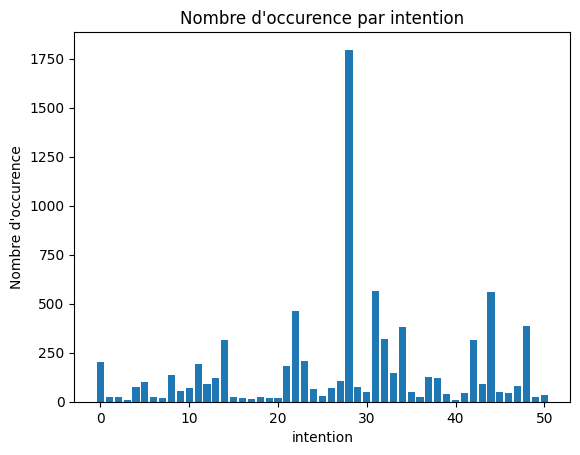

In [41]:
plt.bar(y_train["intention"].value_counts().index, y_train["intention"].value_counts())
plt.xlabel("intention")
plt.ylabel("Nombre d'occurence")
plt.title("Nombre d'occurence par intention")
plt.show()

##### Merging des dataframe x_train et y_train car nous en avons besoin pour l'entrainement du modèle de classification NLP

In [42]:
data = pd.merge(x_train, y_train, on = "ID", how = "inner")

In [43]:
data

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma qu...",28
1,1,est ce que le motilium me soulagera contre les...,31
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...,28
3,3,Est-ce qu'il existe une forme adaptée aux enfa...,44
4,4,mon medecin me soigne pour une rhino pha...,31
...,...,...,...
8023,8023,en combien de temps un antibio n'est plus prés...,41
8024,8024,j'ai fait vacciner de revaxis mon fils 'année ...,48
8025,8025,Un patient m’a ramené une ordonnance de 3x1g d...,42
8026,8026,"prise pillule du lendemain, faire une pause en...",14


In [44]:
ligne_intentions_28 = data.loc[data['intention'] == 28]

In [45]:
ligne_intentions_28

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma qu...",28
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...,28
7,7,je suis sous mercilon. J'ai des nausées et des...,28
12,12,je suis sous antiobiotique depuis bientot une ...,28
14,14,épilepsie et havlane ?,28
...,...,...,...
8003,8003,"bonjour, je voudrais savoir si le stablon et ...",28
8004,8004,je dois utiliser kétoderm 2% gel 2 fois par se...,28
8020,8020,asthme du au sirop stodal?,28
8021,8021,est ce que le temesta pousse au suicide ?,28


##### Partie modélisation

In [46]:
from sklearn.svm import SVC


counter = Counter(data['intention'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
data = data[data['intention'].map(lambda x: x in top_10_varieties)]

description_list = data['question'].tolist()
varietal_list = [top_10_varieties[i] for i in data['intention'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 77.10%


In [47]:
x_test_counts = count_vect.transform(x_test['question'].tolist())
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

# Predict labels for x_test
y_test_score = clf.predict(x_test_tfidf)

# Now you have the predicted labels for x_test, you can do whatever you want with them
# For example, you can add the predicted labels to x_test DataFrame
x_test['predicted_intention'] = [list(top_10_varieties.keys())[i] for i in y_test_score]



In [48]:
x_test

,ID,question,predicted_intention
0,8028,autisme-homéopathie-antidote vaccins ??,32
1,8029,Quel topique appliquer pour dermatite atopique...,32
2,8030,traitement kystes avec diane 35?,28
3,8031,je souffre d'insuffisance veineuse (acrocyanos...,28
4,8032,"je suis enceinte depuis 1 mois, est ce que les...",44
...,...,...,...
2030,10058,La pivalone est elle uttilisable chez la femme...,44
2031,10059,je suis sous traitement depakote 750 depuis pl...,28
2032,10060,est ce que c'est normal d'avoir des règles peu...,28
2033,10061,j'ai été vacciné par l'hépatite b (2 injection...,14


In [49]:
x_test.shape

(2035, 3)

In [50]:
output_test = x_test[["ID", "predicted_intention"]]

In [51]:
output_test

,ID,predicted_intention
0,8028,32
1,8029,32
2,8030,28
3,8031,28
4,8032,44
...,...,...
2030,10058,44
2031,10059,28
2032,10060,28
2033,10061,14


In [52]:
output_test.to_csv("submission.csv", index=False)